# Bar plot for activation capping eval

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('./arena.mplstyle')

In [10]:
# Data
metrics = ['Jailbreak Rate', 'IFEval', 'MMLU Pro', 'GSM8k', 'EQ-Bench']

# Llama 3.3 70B
llama_baseline = [0.6525, 0.9268, 0.7085, 0.885, 83.11]
llama_capped = [0.3255, 0.9328, 0.7050, 0.891, 84.14]

# Qwen 3 32B
qwen_baseline = [0.8325, 0.7626, 0.6750, 0.808, 82.28]
qwen_capped = [0.4109, 0.7614, 0.6721, 0.833, 82.58]

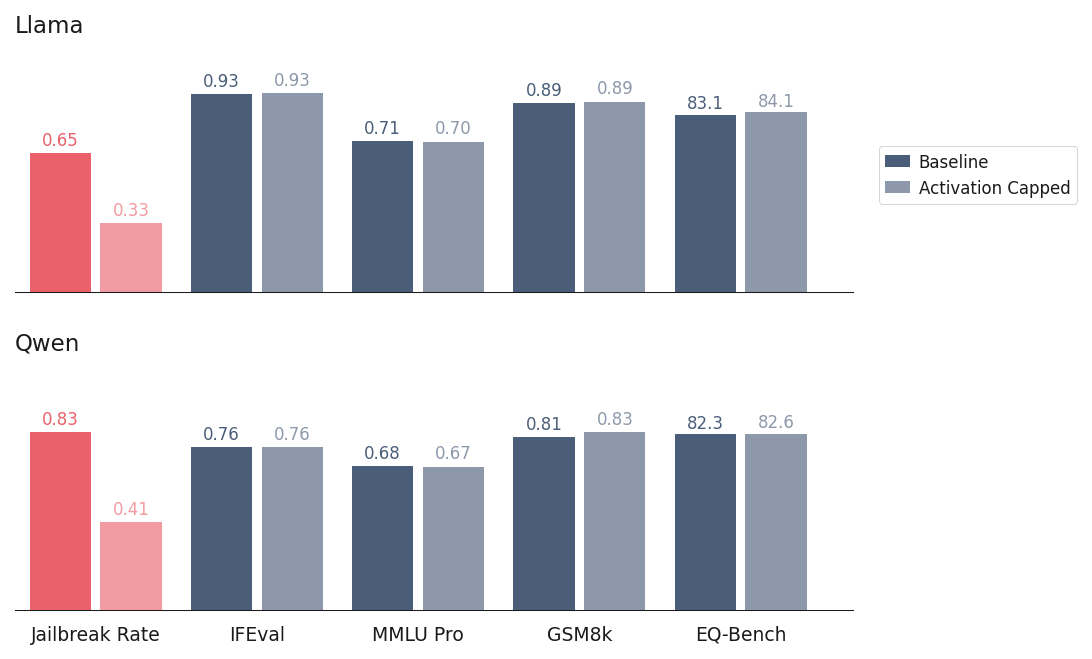

In [22]:
import matplotlib.patches as mpatches

BLUE = '#1d3557'
RED = '#e63946'

fig, axes = plt.subplots(2, 1, figsize=(7, 4.5))

bar_width = 0.38
gap = 0.06  # Gap between bars in a group
x = np.arange(len(metrics))

data_sets = [
    ('Llama', llama_baseline, llama_capped),
    ('Qwen', qwen_baseline, qwen_capped),
]

for idx, (model_name, baseline, capped) in enumerate(data_sets):
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Split data: first 4 metrics (0-1 scale) and EQ-Bench (0-100 scale)
    baseline_01 = baseline[:4]
    capped_01 = capped[:4]
    baseline_100 = baseline[4]
    capped_100 = capped[4]
    
    # Colors: RED for Jailbreak Rate (index 0), BLUE for others
    colors = [RED, BLUE, BLUE, BLUE]
    
    # Plot first 4 metrics on primary axis
    # Baseline = full alpha, Activation Capped = 0.5 alpha (matching fig1_trajectory)
    x_01 = x[:4]
    for i, (xp, val, color) in enumerate(zip(x_01, baseline_01, colors)):
        ax.bar(xp - bar_width/2 - gap/2, val, bar_width, color=color, alpha=0.8)
    for i, (xp, val, color) in enumerate(zip(x_01, capped_01, colors)):
        ax.bar(xp + bar_width/2 + gap/2, val, bar_width, color=color, alpha=0.5)
    
    # Plot EQ-Bench on secondary axis (BLUE)
    x_100 = x[4]
    bars3 = ax2.bar(x_100 - bar_width/2 - gap/2, baseline_100, bar_width, color=BLUE, alpha=0.8)
    bars4 = ax2.bar(x_100 + bar_width/2 + gap/2, capped_100, bar_width, color=BLUE, alpha=0.5)
    
    # Set axis limits
    ax.set_ylim(0, 1.1)
    ax2.set_ylim(0, 110)
    ax.set_xlim(-0.5, len(metrics) - 0.3)
    
    # Add score labels on top of bars (first 4 metrics) - color matches bar
    for i, (xp, val, color) in enumerate(zip(x_01, baseline_01, colors)):
        ax.text(xp - bar_width/2 - gap/2, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=8, color=color, alpha=0.8)
    for i, (xp, val, color) in enumerate(zip(x_01, capped_01, colors)):
        ax.text(xp + bar_width/2 + gap/2, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=8, color=color, alpha=0.5)
    
    # Add score labels for EQ-Bench
    ax2.text(bars3[0].get_x() + bars3[0].get_width()/2, bars3[0].get_height() + 1, f'{baseline_100:.1f}', ha='center', va='bottom', fontsize=8, color=BLUE, alpha=0.8)
    ax2.text(bars4[0].get_x() + bars4[0].get_width()/2, bars4[0].get_height() + 1, f'{capped_100:.1f}', ha='center', va='bottom', fontsize=8, color=BLUE, alpha=0.5)
    
    # Remove spines except bottom
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    
    # Remove y ticks, keep x axis line but no ticks
    ax.set_yticks([])
    ax2.set_yticks([])
    ax.tick_params(left=False, bottom=False)
    ax2.tick_params(right=False)
    
    # X-axis labels only for bottom subplot
    ax.set_xticks(x)
    if idx == 1:
        ax.set_xticklabels(metrics)
    else:
        ax.set_xticklabels([])
    
    # Model name as horizontal subtitle
    ax.set_title(model_name, fontsize=11, loc='left')
    
    # Legend only on first subplot, positioned outside on the right
    if idx == 0:
        legend_handles = [
            mpatches.Patch(facecolor=BLUE, alpha=0.8, label='Baseline'),
            mpatches.Patch(facecolor=BLUE, alpha=0.5, label='Activation Capped')
        ]
        ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True, fontsize=8)

plt.tight_layout()
plt.subplots_adjust(right=0.82, hspace=0.35)
plt.savefig('fig10_barplot.pdf', bbox_inches='tight')
plt.show()